<a href="https://colab.research.google.com/github/thyaravind/Depression_detection/blob/master/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Testing GPU on Colab

In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

## Testing the speed

In [3]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/12
469/469 [==============================] - 4s 9ms/step - loss: 2.2831 - accuracy: 0.1394 - val_loss: 2.2370 - val_accuracy: 0.3542
Epoch 2/12
469/469 [==============================] - 4s 8ms/step - loss: 2.2120 - accuracy: 0.2599 - val_loss: 2.1516 - val_accuracy: 0.5102
Epoch 3/12
469/469 [==============================] - 4s 8ms/step - loss: 2.1238 - accuracy: 0.3641 - val_loss: 2.0351 - val_accuracy: 0.6041
Epoch 4/12
469/469 [==============================] - 4s 8ms/step - loss: 2.0036 - accuracy: 0.4435 - val_loss: 1.8802 - val_accuracy: 0.6484
Epoch 5/12
469/469 [==============================] - 4s 8ms/step - loss: 1.8512 - accuracy: 0.5032 - val_loss: 1.6885 - val_accuracy: 0.6803
Epoch 6/12
469/469 [==============================] - 4s 8ms/step - loss: 1.6807 - accuracy: 0.5530 - val_loss: 1.4796 - val_accuracy: 0.7140
Epoch 7/12
469/469 [==============================] - 4s 8ms/step - loss: 1

# Modeling

Getting the files from github and installing the requirements

In [4]:
!git clone https://github.com/thyaravind/Depression_detection.git

fatal: destination path 'Depression_detection' already exists and is not an empty directory.


In [5]:
pip install -r /content/Depression_detection/requirements.txt

In [6]:
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import ShortTermFeatures
from zipfile import ZipFile
import numpy as np
import pandas as pd
import pickle
import json
import matplotlib.pyplot as plt


train_split = pd.read_csv('/content/drive/Shared drives/EPICS - Project/The Dataset files/train_split_Depression_AVEC2017.csv')


SpecDict = {}

def ExtractFeatures(id):
        [Fs, x] = audioBasicIO.read_audio_file("/content/drive/Shared drives/EPICS - Project/Archives/{}_AUDIO.wav".format(id))
        F, f_names = ShortTermFeatures.feature_extraction(x, Fs, 0.050 * Fs, 0.025 * Fs)
        return F, f_names

Mat, names = ExtractFeatures(303)

In [7]:
Mat.shape

(68, 39411)

In [8]:
names

['zcr',
 'energy',
 'energy_entropy',
 'spectral_centroid',
 'spectral_spread',
 'spectral_entropy',
 'spectral_flux',
 'spectral_rolloff',
 'mfcc_1',
 'mfcc_2',
 'mfcc_3',
 'mfcc_4',
 'mfcc_5',
 'mfcc_6',
 'mfcc_7',
 'mfcc_8',
 'mfcc_9',
 'mfcc_10',
 'mfcc_11',
 'mfcc_12',
 'mfcc_13',
 'chroma_1',
 'chroma_2',
 'chroma_3',
 'chroma_4',
 'chroma_5',
 'chroma_6',
 'chroma_7',
 'chroma_8',
 'chroma_9',
 'chroma_10',
 'chroma_11',
 'chroma_12',
 'chroma_std',
 'delta zcr',
 'delta energy',
 'delta energy_entropy',
 'delta spectral_centroid',
 'delta spectral_spread',
 'delta spectral_entropy',
 'delta spectral_flux',
 'delta spectral_rolloff',
 'delta mfcc_1',
 'delta mfcc_2',
 'delta mfcc_3',
 'delta mfcc_4',
 'delta mfcc_5',
 'delta mfcc_6',
 'delta mfcc_7',
 'delta mfcc_8',
 'delta mfcc_9',
 'delta mfcc_10',
 'delta mfcc_11',
 'delta mfcc_12',
 'delta mfcc_13',
 'delta chroma_1',
 'delta chroma_2',
 'delta chroma_3',
 'delta chroma_4',
 'delta chroma_5',
 'delta chroma_6',
 'delta chro

In [9]:
train_split

,Participant_ID,PHQ8_Binary,PHQ8_Score,Gender,PHQ8_NoInterest,PHQ8_Depressed,PHQ8_Sleep,PHQ8_Tired,PHQ8_Appetite,PHQ8_Failure,PHQ8_Concentrating,PHQ8_Moving
0,303,0,0,0,0,0,0.0,0,0,0,0,0
1,304,0,6,0,0,1,1.0,2,2,0,0,0
2,305,0,7,1,0,1,1.0,2,2,1,0,0
3,310,0,4,1,1,1,0.0,0,0,1,1,0
4,312,0,2,1,0,0,1.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
102,485,0,2,1,0,1,0.0,0,0,0,0,1
103,486,0,4,0,1,1,0.0,1,0,1,0,0
104,487,0,0,0,0,0,0.0,0,0,0,0,0
105,488,0,0,0,0,0,0.0,0,0,0,0,0


In [10]:
train_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Participant_ID      107 non-null    int64  
 1   PHQ8_Binary         107 non-null    int64  
 2   PHQ8_Score          107 non-null    int64  
 3   Gender              107 non-null    int64  
 4   PHQ8_NoInterest     107 non-null    int64  
 5   PHQ8_Depressed      107 non-null    int64  
 6   PHQ8_Sleep          106 non-null    float64
 7   PHQ8_Tired          107 non-null    int64  
 8   PHQ8_Appetite       107 non-null    int64  
 9   PHQ8_Failure        107 non-null    int64  
 10  PHQ8_Concentrating  107 non-null    int64  
 11  PHQ8_Moving         107 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 10.2 KB


In [11]:
train_split.loc[train_split['Participant_ID'] == 303,['PHQ8_Binary']]

,PHQ8_Binary
0,0


In [12]:
train_split.query('Participant_ID == 303')

,Participant_ID,PHQ8_Binary,PHQ8_Score,Gender,PHQ8_NoInterest,PHQ8_Depressed,PHQ8_Sleep,PHQ8_Tired,PHQ8_Appetite,PHQ8_Failure,PHQ8_Concentrating,PHQ8_Moving
0,303,0,0,0,0,0,0.0,0,0,0,0,0


In [13]:
with open('/content/drive/Shared drives/EPICS - Project/Model_Files/feature.pkl','rb') as f:
    features = pickle.load(f)

In [14]:
features['303'].shape

(68, 39411)

In [15]:
df = pd.DataFrame(Mat.T,columns = names)
df['id'] = 303
df = df.merge(train_split,left_on = 'id', right_on ='Participant_ID')

In [16]:
df

,zcr,energy,energy_entropy,spectral_centroid,spectral_spread,spectral_entropy,spectral_flux,spectral_rolloff,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11,chroma_12,chroma_std,delta zcr,delta energy,delta energy_entropy,delta spectral_centroid,delta spectral_spread,delta spectral_entropy,...,delta spectral_rolloff,delta mfcc_1,delta mfcc_2,delta mfcc_3,delta mfcc_4,delta mfcc_5,delta mfcc_6,delta mfcc_7,delta mfcc_8,delta mfcc_9,delta mfcc_10,delta mfcc_11,delta mfcc_12,delta mfcc_13,delta chroma_1,delta chroma_2,delta chroma_3,delta chroma_4,delta chroma_5,delta chroma_6,delta chroma_7,delta chroma_8,delta chroma_9,delta chroma_10,delta chroma_11,delta chroma_12,delta chroma_std,id,Participant_ID,PHQ8_Binary,PHQ8_Score,Gender,PHQ8_NoInterest,PHQ8_Depressed,PHQ8_Sleep,PHQ8_Tired,PHQ8_Appetite,PHQ8_Failure,PHQ8_Concentrating,PHQ8_Moving
0,0.046308,0.000026,2.742921,0.197554,0.259934,0.213770,0.000000,0.0325,-34.173104,2.406724,0.151568,0.003283,0.055715,0.118470,-0.001977,-0.163332,-0.080768,-0.113622,-0.244917,0.057066,0.337817,0.003607,0.000486,0.007049,0.002857,0.009708,0.005425,0.299294,0.000039,0.004285,0.002294,0.044003,0.000454,0.081512,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,303,303,0,0,0,0,0,0.0,0,0,0,0,0
1,0.028786,0.000083,2.576184,0.147337,0.241393,0.058681,0.014247,0.0025,-34.300754,2.463100,0.402829,0.160150,0.367820,0.287522,-0.040874,-0.340247,-0.318288,0.052182,0.088326,0.105486,0.110256,0.001000,0.000047,0.012266,0.002430,0.001744,0.001405,0.203051,0.000283,0.000660,0.000276,0.091618,0.000175,0.058822,-0.017522,0.000057,-0.166737,-0.050217,-0.018541,-0.155089,...,-0.0300,-0.127649,0.056376,0.251261,0.156866,0.312106,0.169052,-0.038897,-0.176915,-0.237520,0.165804,0.333243,0.048421,-0.227561,-0.002607,-0.000439,0.005217,-0.000427,-0.007964,-0.004020,-0.096243,0.000244,-0.003625,-0.002018,0.047614,-0.000279,-0.022690,303,303,0,0,0,0,0,0.0,0,0,0,0,0
2,0.025031,0.000089,2.768676,0.146715,0.239105,0.063293,0.004253,0.0025,-34.131179,2.674428,0.407502,0.223189,0.254566,0.091420,-0.105590,-0.191369,-0.405743,-0.265215,0.021634,0.067018,0.075201,0.001274,0.000058,0.006505,0.003189,0.001158,0.001935,0.299703,0.000440,0.000926,0.000329,0.058868,0.000200,0.082490,-0.003755,0.000006,0.192492,-0.000622,-0.002288,0.004613,...,0.0000,0.169575,0.211327,0.004674,0.063039,-0.113254,-0.196102,-0.064716,0.148878,-0.087456,-0.317398,-0.066693,-0.038468,-0.035055,0.000273,0.000011,-0.005761,0.000759,-0.000586,0.000530,0.096652,0.000157,0.000266,0.000053,-0.032749,0.000025,0.023668,303,303,0,0,0,0,0,0.0,0,0,0,0,0
3,0.040050,0.000020,3.116780,0.203110,0.260869,0.265799,0.020549,0.0350,-34.302977,2.428921,0.411491,0.190633,0.001715,0.100997,-0.185295,-0.203822,-0.296861,-0.261140,0.028538,0.033054,0.147889,0.003539,0.000523,0.022915,0.010603,0.002686,0.014542,0.337897,0.000694,0.003406,0.003012,0.023388,0.000213,0.091593,0.015019,-0.000069,0.348104,0.056395,0.021764,0.202506,...,0.0325,-0.171799,-0.245507,0.003989,-0.032556,-0.252851,0.009577,-0.079705,-0.012454,0.108882,0.004075,0.006904,-0.033964,0.072688,0.002265,0.000465,0.016410,0.007414,0.001528,0.012607,0.038193,0.000254,0.002481,0.002683,-0.035481,0.000012,0.009103,303,303,0,0,0,0,0,0.0,0,0,0,0,0
4,0.055069,0.000015,2.890394,0.219108,0.265329,0.366614,0.002999,0.0400,-34.338352,2.181216,0.444952,0.009998,0.008601,0.018273,-0.245665,-0.231136,-0.053578,-0.053275,-0.004425,0.063290,0.026182,0.003839,0.000652,0.028821,0.004736,0.002973,0.010529,0.304076,0.000746,0.009362,0.001481,0.026026,0.001389,0.082281,0.015019,-0.000004,-0.226386,0.015998,0.004460,0.100815,...,0.0050,-0.035

Text(0.5, 1.0, 'feature: energy')

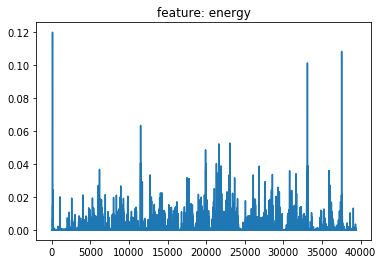

In [17]:
fig = plt.figure()
plt.plot(features['303'][1])
plt.title('feature: energy')

In [18]:
df = pd.DataFrame()

def addparticipants(key,value):  
  df = pd.DataFrame(value.T,columns = names)
  df['id'] = int(key)
  df = df.merge(train_split,left_on = 'id', right_on ='Participant_ID')
  print(f'completed participant with id:{key}')
  return df


for key, value in features.items():
  newdf = addparticipants(key,value)
  df = pd.concat([df,newdf])

completed participant with id:303
completed participant with id:304
completed participant with id:305
completed participant with id:310
completed participant with id:312
completed participant with id:313
completed participant with id:315
completed participant with id:316
completed participant with id:317
completed participant with id:318
completed participant with id:319
completed participant with id:320
completed participant with id:321
completed participant with id:322
completed participant with id:324
completed participant with id:325
completed participant with id:326
completed participant with id:327
completed participant with id:328
completed participant with id:330
completed participant with id:333
completed participant with id:336
completed participant with id:338
completed participant with id:339
completed participant with id:340
completed participant with id:341
completed participant with id:343
completed participant with id:344
completed participant with id:345
completed part

In [19]:
df

,zcr,energy,energy_entropy,spectral_centroid,spectral_spread,spectral_entropy,spectral_flux,spectral_rolloff,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11,chroma_12,chroma_std,delta zcr,delta energy,delta energy_entropy,delta spectral_centroid,delta spectral_spread,delta spectral_entropy,...,delta spectral_rolloff,delta mfcc_1,delta mfcc_2,delta mfcc_3,delta mfcc_4,delta mfcc_5,delta mfcc_6,delta mfcc_7,delta mfcc_8,delta mfcc_9,delta mfcc_10,delta mfcc_11,delta mfcc_12,delta mfcc_13,delta chroma_1,delta chroma_2,delta chroma_3,delta chroma_4,delta chroma_5,delta chroma_6,delta chroma_7,delta chroma_8,delta chroma_9,delta chroma_10,delta chroma_11,delta chroma_12,delta chroma_std,id,Participant_ID,PHQ8_Binary,PHQ8_Score,Gender,PHQ8_NoInterest,PHQ8_Depressed,PHQ8_Sleep,PHQ8_Tired,PHQ8_Appetite,PHQ8_Failure,PHQ8_Concentrating,PHQ8_Moving
0,0.046308,0.000026,2.742921,0.197554,0.259934,0.213770,0.000000,0.0325,-34.173105,2.406724,0.151568,0.003283,0.055715,0.118470,-0.001977,-0.163332,-0.080768,-0.113622,-0.244917,0.057066,0.337817,0.003607,0.000486,0.007049,0.002857,0.009708,0.005425,0.299294,0.000039,0.004285,0.002294,0.044003,0.000454,0.081512,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,303,303,0,0,0,0,0,0.0,0,0,0,0,0
1,0.028786,0.000083,2.576184,0.147337,0.241393,0.058681,0.014247,0.0025,-34.300754,2.463100,0.402829,0.160150,0.367820,0.287522,-0.040874,-0.340247,-0.318288,0.052182,0.088326,0.105486,0.110256,0.001000,0.000047,0.012266,0.002430,0.001744,0.001405,0.203051,0.000283,0.000660,0.000276,0.091618,0.000175,0.058822,-0.017522,0.000057,-0.166737,-0.050217,-0.018541,-0.155089,...,-0.0300,-0.127649,0.056376,0.251261,0.156866,0.312106,0.169052,-0.038897,-0.176915,-0.237520,0.165804,0.333243,0.048421,-0.227561,-0.002607,-0.000439,0.005217,-0.000427,-0.007964,-0.004020,-0.096243,0.000244,-0.003625,-0.002018,0.047614,-0.000279,-0.022690,303,303,0,0,0,0,0,0.0,0,0,0,0,0
2,0.025031,0.000089,2.768676,0.146715,0.239105,0.063293,0.004253,0.0025,-34.131179,2.674428,0.407502,0.223189,0.254566,0.091420,-0.105590,-0.191369,-0.405743,-0.265215,0.021634,0.067018,0.075201,0.001274,0.000058,0.006505,0.003189,0.001158,0.001935,0.299703,0.000440,0.000926,0.000329,0.058868,0.000200,0.082490,-0.003755,0.000006,0.192492,-0.000622,-0.002288,0.004613,...,0.0000,0.169575,0.211327,0.004674,0.063039,-0.113254,-0.196102,-0.064716,0.148878,-0.087456,-0.317398,-0.066693,-0.038468,-0.035055,0.000273,0.000011,-0.005761,0.000759,-0.000586,0.000530,0.096652,0.000157,0.000266,0.000053,-0.032749,0.000025,0.023668,303,303,0,0,0,0,0,0.0,0,0,0,0,0
3,0.040050,0.000020,3.116780,0.203110,0.260869,0.265799,0.020549,0.0350,-34.302978,2.428921,0.411491,0.190633,0.001715,0.100997,-0.185295,-0.203822,-0.296861,-0.261140,0.028538,0.033054,0.147889,0.003539,0.000523,0.022915,0.010603,0.002686,0.014542,0.337897,0.000694,0.003406,0.003012,0.023388,0.000213,0.091593,0.015019,-0.000069,0.348104,0.056395,0.021764,0.202506,...,0.0325,-0.171799,-0.245507,0.003989,-0.032556,-0.252851,0.009577,-0.079705,-0.012454,0.108882,0.004075,0.006904,-0.033964,0.072688,0.002265,0.000465,0.016410,0.007414,0.001528,0.012607,0.038193,0.000254,0.002481,0.002683,-0.035481,0.000012,0.009103,303,303,0,0,0,0,0,0.0,0,0,0,0,0
4,0.055069,0.000015,2.890394,0.219108,0.265329,0.366614,0.002999,0.0400,-34.338352,2.181216,0.444952,0.009998,0.008601,0.018273,-0.245665,-0.231136,-0.053578,-0.053275,-0.004425,0.063290,0.026182,0.003839,0.000652,0.028821,0.004736,0.002973,0.010529,0.304076,0.000746,0.009362,0.001481,0.026026,0.001389,0.082281,0.015019,-0.000004,-0.226386,0.015998,0.004460,0.100815,...,0.0050,-0.035

In [20]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation
from sklearn.preprocessing import MinMaxScaler

In [22]:
feature_names = ['energy','energy_entropy','spectral_centroid','spectral_spread','spectral_entropy','spectral_flux','mfcc_1','mfcc_2','mfcc_3','mfcc_4','mfcc_5','mfcc_6','mfcc_7','mfcc_8','mfcc_9','mfcc_10','mfcc_11','mfcc_12','mfcc_13']
X = df.loc[:,feature_names]
"""
id_df = pd.get_dummies(df['id'],prefix = 'id')
X = pd.concat([X,id_df],axis =1)
"""


scaler = MinMaxScaler(feature_range = (0,1))
X = pd.DataFrame(scaler.fit_transform(X.values))
X.shape

(3874032, 19)

In [24]:
y = df.loc[:,['PHQ8_Binary']]
y

,PHQ8_Binary
0,0
1,0
2,0
3,0
4,0
...,...
35262,0
35263,0
35264,0
35265,0


In [ ]:
#creating CNN

model = Sequential()
model.add(Dense(150,input_dim = 19, activation = 'relu'))
model.add(Dense(75,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(75,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='linear'))

model.compile(loss='binary_crossentropy',optimizer = 'adam',metrics=['accuracy'])



#fitting the data
model.fit(X,y,epochs = 10, verbose = 1)

Epoch 1/10
121064/121064 [==============================] - 327s 3ms/step - loss: 0.5948 - accuracy: 0.6822
Epoch 2/10
121064/121064 [==============================] - 323s 3ms/step - loss: 0.5942 - accuracy: 0.7068
Epoch 3/10
121064/121064 [==============================] - 323s 3ms/step - loss: 0.5942 - accuracy: 0.7187
Epoch 4/10
121064/121064 [==============================] - 327s 3ms/step - loss: 0.5942 - accuracy: 0.7187
Epoch 5/10
  7811/121064 [>.............................] - ETA: 5:08 - loss: 0.5949 - accuracy: 0.7181